<a href="https://colab.research.google.com/github/hajeog/Seminar_class/blob/main/%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
469/469 - 13s - loss: 0.5659 - accuracy: 0.8034 - val_loss: 0.3381 - val_accuracy: 0.8794 - 13s/epoch - 27ms/step
Epoch 2/30
469/469 - 6s - loss: 0.3633 - accuracy: 0.8714 - val_loss: 0.2940 - val_accuracy: 0.8923 - 6s/epoch - 12ms/step
Epoch 3/30
469/469 - 6s - loss: 0.3094 - accuracy: 0.8895 - val_loss: 0.2587 - val_accuracy: 0.9045 - 6s/epoch - 12ms/step
Epoch 4/30
469/469 - 6s - loss: 0.2763 - accuracy: 0.9001 - val_loss: 0.2409 - val_accuracy: 0.9123 - 6s/epoch - 12ms/step
Epoch 5/30
469/469 - 6s - loss: 0.2531 - accuracy: 0.9095 - val_loss: 0.2341 - val_accuracy: 0.9168 - 6s/epoch - 12ms/step
Epoch 6/30
469/469 - 6s - loss: 0.2321 - accuracy: 0.9147 - val_loss: 0.2297 - val_accuracy: 0.9179 - 6s/epoch - 12ms/step
Epoch 7/30
469/469 - 6s - loss: 0.2145 - accuracy: 0.9212 - val_loss: 0.2317 - val_accuracy: 0.9185 - 6s/epoch - 12ms/step
Epoch 8/30
469/469 - 6s - loss: 0.2030 - accuracy: 0.9252 - val_loss: 0.2158 - val_accuracy: 0.9235 - 6s/epoch - 12ms/step
Epoch 9/30
469

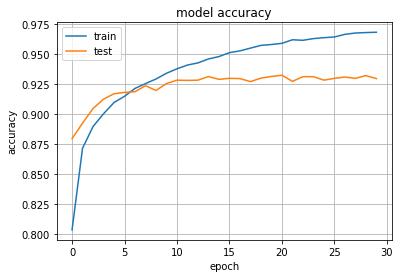

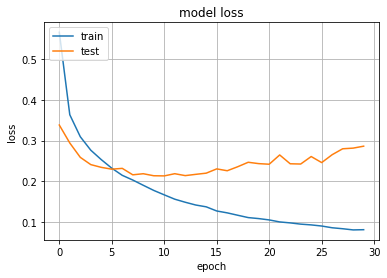

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

cnn = Sequential()
cnn.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 학습
res = cnn.evaluate(x_test,y_test,verbose=0)
print('정확도 : ',res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()